In [1]:
import numpy as np
import pandas as pd

Load the Feature data set

In [2]:
train_iobp_df=pd.read_csv('/content/train_iobp_df1.csv')

In [3]:
# droping duplicates row
train_iobp_df.drop_duplicates(inplace=True)

Split into X and Y

In [4]:
X=train_iobp_df.drop(columns=['Provider', 'PotentialFraud'],axis=1)
y=train_iobp_df['PotentialFraud']

Shape of X and Y data

In [5]:
X.shape, type(X), y.shape, type(y)


((5410, 299), pandas.core.frame.DataFrame, (5410,), pandas.core.series.Series)

In [6]:
X.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Gender_1,Race_2,Race_3,Race_5,admitted_1,Is_Alive?_1
0,104640,5340.0,8,15,19,17,5,10,9,21,...,0.0,0.0,0.0,0.0,9,4,0,0,5,0
1,605670,66286.0,29,56,80,64,10,41,54,100,...,0.0,3.0,1.0,0.0,54,24,0,1,62,1
2,52170,310.0,23,64,88,50,16,41,63,105,...,0.0,0.0,0.0,0.0,46,24,5,0,0,1
3,280910,3700.0,259,426,680,507,165,295,485,799,...,0.0,0.0,0.0,0.0,511,262,10,0,0,4
4,33710,3264.0,11,26,40,22,12,16,29,49,...,0.0,0.0,0.0,0.0,34,14,0,0,3,1


In [7]:
y.head()

,PotentialFraud
0,0
1,1
2,0
3,1
4,0


In [8]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=40)

In [9]:
#shape of each dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4328, 299), (1082, 299), (4328,), (1082,))

In [10]:
# Checking count of tgt labels in y_train
y_train.value_counts()/len(y_train)*100

,count
PotentialFraud,
0,90.642329
1,9.357671


In [11]:
# Checking count of tgt labels in y_test
y_test.value_counts()

,count
PotentialFraud,
0,981
1,101


In [12]:
#Standardization the train and text dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,  f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

#Random Forest

In [14]:
model_rf=RandomForestClassifier(n_estimators= 170, max_depth= 13, min_samples_split= 7, min_samples_leaf= 17, criterion= 'entropy')
score_rf=cross_val_score(model_rf,X_train_scaled,y_train,cv=5).mean()
score_rf


np.float64(0.9292971472052758)

In [15]:
# Fit the model on the training data and make predictions
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')
print(f'Recall: {recall_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Metrics:
Accuracy: 0.9390018484288355
F1 Score: 0.5822784810126582
Recall: 0.45544554455445546
Precision: 0.8070175438596491

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       981
           1       0.81      0.46      0.58       101

    accuracy                           0.94      1082
   macro avg       0.88      0.72      0.77      1082
weighted avg       0.93      0.94      0.93      1082


Confusion Matrix:
 [[970  11]
 [ 55  46]]


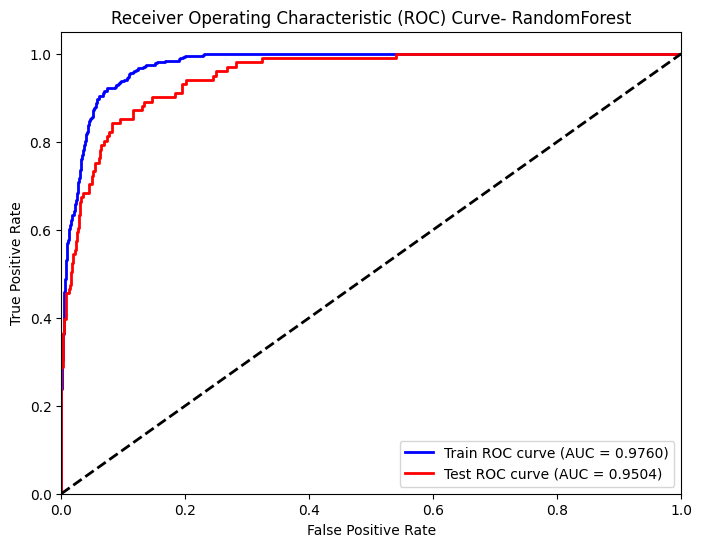

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for the positive class
y_train_pred_proba_rf = model_rf.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train, y_train_pred_proba_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

# Calculate ROC curve and AUC for testing set
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, y_test_pred_proba_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, color='blue', lw=2, label='Train ROC curve (AUC = %0.4f)' % roc_auc_train_rf)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', lw=2, label='Test ROC curve (AUC = %0.4f)' % roc_auc_test_rf)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- RandomForest')
plt.legend(loc="lower right")
plt.show()

# XGBoost Classifier

In [17]:
import xgboost
from xgboost import XGBClassifier

In [18]:
model_xgb=XGBClassifier(n_estimators= 720, max_depth= 16, min_child_weight= 22, learning_rate= 0.0275, reg_alpha= 0.4471, reg_lambda= 0.9697)
score_xgb=cross_val_score(model_xgb,X_train_scaled,y_train,cv=5).mean()
score_xgb

np.float64(0.9332269820715802)

In [19]:
# Fit the model on the training data and make predictions
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f'F1 Score: {f1_score(y_test, y_pred_xgb)}')
print(f'Recall: {recall_score(y_test, y_pred_xgb)}')
print(f'Precision: {precision_score(y_test, y_pred_xgb)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Random Forest Classifier Metrics:
Accuracy: 0.933456561922366
F1 Score: 0.5714285714285714
Recall: 0.4752475247524752
Precision: 0.7164179104477612

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       981
           1       0.72      0.48      0.57       101

    accuracy                           0.93      1082
   macro avg       0.83      0.73      0.77      1082
weighted avg       0.93      0.93      0.93      1082


Confusion Matrix:
 [[962  19]
 [ 53  48]]


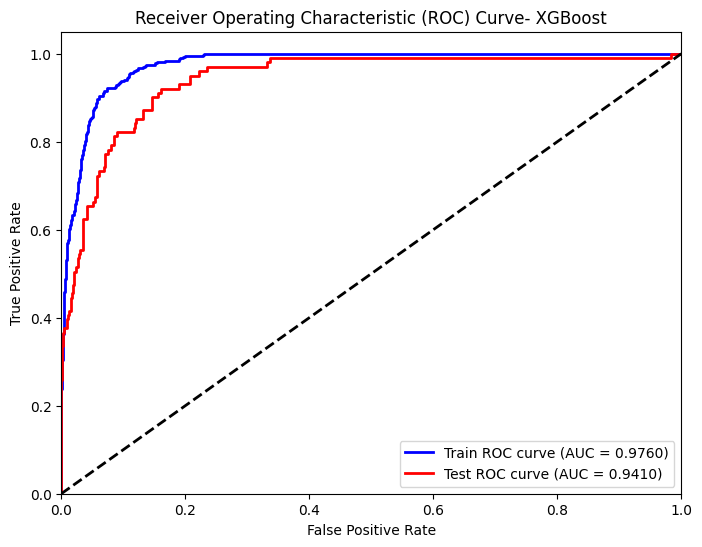

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
## Get probability predictions for the positive class
y_train_pred_proba_xgb = model_xgb.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]
# Calculate ROC curve and AUC for training set
fpr_train_xgb, tpr_train_xgb, thresholds_train_xgb = roc_curve(y_train, y_train_pred_proba_rf)
roc_auc_train_xgb = auc(fpr_train_xgb, tpr_train_xgb)

# Calculate ROC curve and AUC for testing set
fpr_test_xgb, tpr_test_xgb, thresholds_test_xgb = roc_curve(y_test, y_test_pred_proba_xgb)
roc_auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, color='blue', lw=2, label='Train ROC curve (AUC = %0.4f)' % roc_auc_train_xgb)
plt.plot(fpr_test_xgb, tpr_test_xgb, color='red', lw=2, label='Test ROC curve (AUC = %0.4f)' % roc_auc_test_xgb)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- XGBoost')
plt.legend(loc="lower right")
plt.show()

Using Minority Synthetic Oversampling

In [21]:
#performance minorit oversampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=40)
X_train_smote,y_train_smote=smote.fit_resample(X_train_scaled,y_train)

In [22]:
X_train_smote.shape, y_train_smote.shape
#

((7846, 299), (7846,))

RandomForest with Smote

In [23]:
  #model
model_rf_smote =RandomForestClassifier(n_estimators= 250, max_depth= 9, min_samples_split= 17, min_samples_leaf= 7, criterion= 'entropy')

#score
score_rf_smote = cross_val_score(model_rf_smote,X_train_smote,y_train_smote,cv=5).mean()
score_rf_smote

np.float64(0.9314322482168447)

In [24]:
# fit the model on test data
model_rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = model_rf_smote.predict(X_test_scaled)

print("Random Forest Classifier Metrics (with SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_smote)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_smote)}")
print(f"Recall: {recall_score(y_test, y_pred_rf_smote)}")
print(f"Precision: {precision_score(y_test, y_pred_rf_smote)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))


Random Forest Classifier Metrics (with SMOTE):
Accuracy: 0.9029574861367837
F1 Score: 0.6153846153846154
Recall: 0.8316831683168316
Precision: 0.4883720930232558

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       981
           1       0.49      0.83      0.62       101

    accuracy                           0.90      1082
   macro avg       0.73      0.87      0.78      1082
weighted avg       0.94      0.90      0.91      1082


Confusion Matrix:
 [[893  88]
 [ 17  84]]


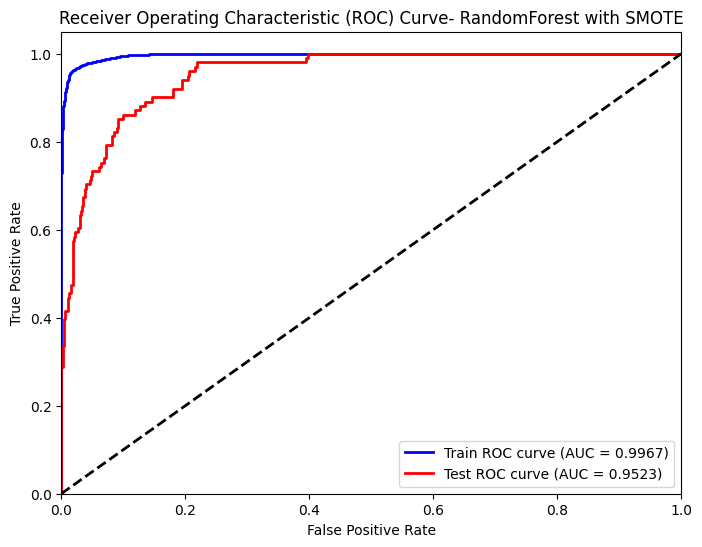

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for the positive class
y_train_pred_proba_rf_smote = model_rf_smote.predict_proba(X_train_smote)[:, 1]
y_test_pred_proba_rf_smote = model_rf_smote.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train_rf_smote, tpr_train_rf_smote, thresholds_train_rf_smote = roc_curve(y_train_smote, y_train_pred_proba_rf_smote)
roc_auc_train_rf_smote = auc(fpr_train_rf_smote, tpr_train_rf_smote)

# Calculate ROC curve and AUC for testing set
fpr_test_rf_smote, tpr_test_rf_smote, thresholds_test_rf_smote = roc_curve(y_test, y_test_pred_proba_rf_smote)
roc_auc_test_rf_smote = auc(fpr_test_rf_smote, tpr_test_rf_smote)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf_smote, tpr_train_rf_smote, color='blue', lw=2, label='Train ROC curve (AUC = %0.4f)' % roc_auc_train_rf_smote)
plt.plot(fpr_test_rf_smote, tpr_test_rf_smote, color='red', lw=2, label='Test ROC curve (AUC = %0.4f)' % roc_auc_test_rf_smote)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- RandomForest with SMOTE')
plt.legend(loc="lower right")
plt.show()

XGBoost classifier with SMOTE

In [26]:
 #model
model_xgb_smote=XGBClassifier(n_estimators=880,
                      max_depth=23,
                      min_child_weight=2,
                      learning_rate=0.4818,
                      reg_alpha=0.2497,
                      reg_lambda=0.6337)
#score
score_xgb_smote = cross_val_score(model_xgb_smote,X_train_smote,y_train_smote,cv=5).mean()
score_xgb_smote
#


np.float64(0.9603703117324922)

In [27]:
# Evaluate the best XGBoost model trained on oversampled data
model_xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = model_xgb_smote.predict(X_test_scaled)

print("XGBoost Classifier Metrics (with SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_smote)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb_smote)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb_smote)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb_smote)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))

XGBoost Classifier Metrics (with SMOTE):
Accuracy: 0.9297597042513863
F1 Score: 0.5824175824175825
Recall: 0.5247524752475248
Precision: 0.654320987654321

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       981
           1       0.65      0.52      0.58       101

    accuracy                           0.93      1082
   macro avg       0.80      0.75      0.77      1082
weighted avg       0.92      0.93      0.93      1082


Confusion Matrix:
 [[953  28]
 [ 48  53]]


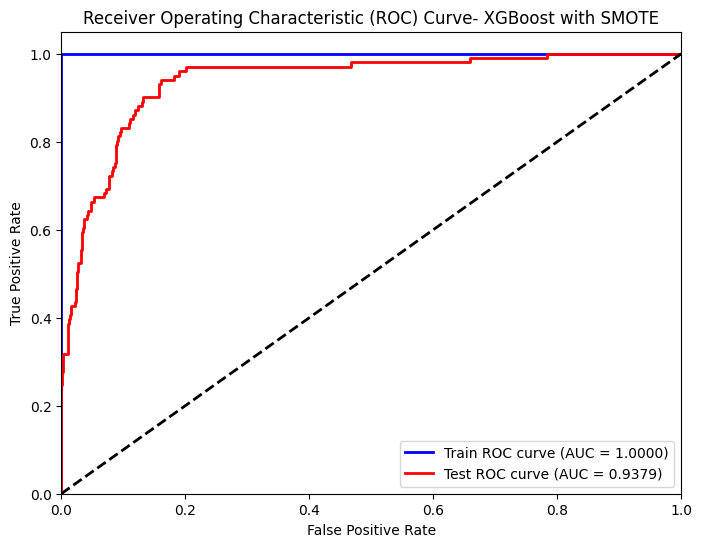

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
## Get probability predictions for the positive class
y_train_pred_proba_xgb_smote = model_xgb_smote.predict_proba(X_train_smote)[:, 1]
y_test_pred_proba_xgb_smote = model_xgb_smote.predict_proba(X_test_scaled)[:, 1]
# Calculate ROC curve and AUC for training set
fpr_train_xgb_smote, tpr_train_xgb_smote, thresholds_train_xgb_smote = roc_curve(y_train_smote, y_train_pred_proba_xgb_smote)
roc_auc_train_xgb_smote = auc(fpr_train_xgb_smote, tpr_train_xgb_smote)

# Calculate ROC curve and AUC for testing set
fpr_test_xgb_smote, tpr_test_xgb_smote, thresholds_test_xgb_smote = roc_curve(y_test, y_test_pred_proba_xgb_smote)
roc_auc_test_xgb_smote = auc(fpr_test_xgb_smote, tpr_test_xgb_smote)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb_smote, tpr_train_xgb_smote, color='blue', lw=2, label='Train ROC curve (AUC = %0.4f)' % roc_auc_train_xgb_smote)
plt.plot(fpr_test_xgb_smote, tpr_test_xgb_smote, color='red', lw=2, label='Test ROC curve (AUC = %0.4f)' % roc_auc_test_xgb_smote)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- XGBoost with SMOTE')
plt.legend(loc="lower right")
plt.show()